# Advanced Dataframes Exercises

In [1]:
import pandas as pd
from pydataset import data
import numpy as np

## 1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [2]:
mpg = data('mpg') # load the dataset and store it in a variable

In [3]:
data('mpg', show_doc=True) # view the documentation for the dataset

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [4]:
mpg.head(10) #Lets look at a few rows of our dataframe

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


### 1a. On average, which manufacturer has the best miles per gallon?

In [5]:
mpg['average_mileage'] = (mpg['cty'] + mpg['hwy']) / 2 #We need a column showing average mileage between city and highway

In [6]:
mpg.head(5) #We see that the new column has been added

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [7]:
mpg.groupby('manufacturer').average_mileage.mean()
#Now we can use .groupby to select all of the manufacturers, and then look at the 
#means of their values in the average_mileage column to get a sense of what their 
#average_mileage looks like for the manufacturer as a whole 

manufacturer
audi          22.027778
chevrolet     18.447368
dodge         15.540541
ford          16.680000
honda         28.500000
hyundai       22.750000
jeep          15.562500
land rover    14.000000
lincoln       14.166667
mercury       15.625000
nissan        21.346154
pontiac       21.700000
subaru        22.428571
toyota        21.720588
volkswagen    25.074074
Name: average_mileage, dtype: float64

In [8]:
average_mileage_manufacturer = mpg.groupby('manufacturer').average_mileage.mean()
average_mileage_manufacturer.nlargest(1, keep='all')
#We can use the .nlargest method to select the row with the highest average average_mileage

manufacturer
honda    28.5
Name: average_mileage, dtype: float64

In [9]:
average_mileage_manufacturer.nlargest(1, keep='all').index[0]
#We can isolate the string describing this manufactuer using the .index[0] on our series

'honda'

In [10]:
print(f"On average, {average_mileage_manufacturer.nlargest(1, keep='all').index[0].capitalize()} is the manufacturer with the best mpg.")
#We can use print formatting to create a statement, and use .capitalize() to change the casing of the manufacturer's name

On average, Honda is the manufacturer with the best mpg.


### 1b. How many different manufacturers are there?

In [11]:
mpg['manufacturer'].unique()
#We can use the .unique() method on our 'manufacturer' column to create an array listing all of the manufacturers in the dataframe

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [12]:
print(f"There are {len(mpg['manufacturer'].unique())} different manufacturers.")
#We can then use len() to programmatically count the number of manufacturers and pass that to a formatted print() function

There are 15 different manufacturers.


### 1c. How many different models are there?

In [13]:
mpg.model.unique()
#Similar to how we counted the number of manufacturers, we can create an array of unique models

array(['a4', 'a4 quattro', 'a6 quattro', 'c1500 suburban 2wd', 'corvette',
       'k1500 tahoe 4wd', 'malibu', 'caravan 2wd', 'dakota pickup 4wd',
       'durango 4wd', 'ram 1500 pickup 4wd', 'expedition 2wd',
       'explorer 4wd', 'f150 pickup 4wd', 'mustang', 'civic', 'sonata',
       'tiburon', 'grand cherokee 4wd', 'range rover', 'navigator 2wd',
       'mountaineer 4wd', 'altima', 'maxima', 'pathfinder 4wd',
       'grand prix', 'forester awd', 'impreza awd', '4runner 4wd',
       'camry', 'camry solara', 'corolla', 'land cruiser wagon 4wd',
       'toyota tacoma 4wd', 'gti', 'jetta', 'new beetle', 'passat'],
      dtype=object)

In [14]:
print(f"There are {len(mpg.model.unique())} different models.")
#And then use len() to count all of the elements of that array

There are 38 different models.


### 1d. Do automatic or manual cars have better miles per gallon?

In [15]:
#While the 'trans' column does contain distinctions between automatic and manual transmissions
#It also further specifies additional details in parenthesis
#If we used .groupby() to aggregate the unique strings in the 'trans' column, we would output more rows than the question seems to be implying
#We can clean this data by creating a new column that labels all automatic transmissions as 'auto' regardless of their details
#And labels all manual transmissions as 'manual' regardless of their details
#This will leave us with only two unique strings: 'auto' and 'manual' in a new column that we will call 'trans_simple'
mpg['trans_simple'] = mpg['trans'].apply(lambda x : x[0:4] if x[0:4] == 'auto' else x[0:6])

In [16]:
mpg.head()
#We see that we have successfully cleaned the strings from the 'trans' column and used them in the 'trans_simple' column

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,trans_simple
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,auto


In [17]:
mpg.groupby('trans_simple').average_mileage.mean()
#Using .groupby on our cleaned column and obtaining the mean average_mileage of 
#each transmission type gives us a series with two rows

trans_simple
auto      19.130573
manual    22.227273
Name: average_mileage, dtype: float64

In [18]:
mpg.groupby('trans_simple').average_mileage.mean().nlargest(1, keep='all')
#We can use .nlargest() to select only the row with the highest value

trans_simple
manual    22.227273
Name: average_mileage, dtype: float64

In [19]:
print(f"On average {mpg.groupby('trans_simple').average_mileage.mean().nlargest(1, keep='all').index[0]} cars have better mpg.")
#Then we can use .index[0] to isolate the index of that row to obtain the description and pass that into a formatted string

On average manual cars have better mpg.


## 2. Joining and Merging

#### Copy the users and roles dataframes from the examples above.  

In [20]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users
#We create a dataframe using the pd.DataFrame function and pass a dictionary as an argument

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [21]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles
#We create a dataframe using the pd.DataFrame function and pass a dictionary as an argument

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


###  2a. What do you think a right join would look like?

In [22]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='right')
#A right join includes all columns from the right dataframe, 
#even if there are no corresponding matching values in the left dataframe
#Missing values in the left dataframe are given the NaN entry (not a number)

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


### 2b. An outer join?

In [23]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')
#An outer join, the most useless of joins, contains every row from both dataframes
#There is not a need to have matching values between the primary key and the foreign key being used to join the dataframes
#All missing values are given the NaN value (not a number)

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


### 2c. What happens if you drop the foreign keys from the dataframes and try to merge them?

In [24]:
users = users.drop(columns=['role_id'])
print(users)
#In this example, the dataframe 'users' has a foreign key 'role_id' 
# that matches the primary key 'id' in the dataframe 'roles'

   id   name
0   1    bob
1   2    joe
2   3  sally
3   4   adam
4   5   jane
5   6   mike


In [25]:
try:
    pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')
except KeyError:
    print('You generated a KeyError!')
#If you dropped the 'role_id' from the 'users' dataframe, you would need to select another column to join on
#Otherwise you will generate a KeyError


You generated a KeyError!


In [26]:
pd.merge(users, roles, left_on='id', right_on='id', how='outer')
#The only numeric column that you could use at this point would be 'id', but these 'id' columns are not related to each other!
#Joining the 'id' column in 'users' to the 'id' column in 'roles' would give you a table
#But that table would grossly misrepresent the relationships between columns/in each row
#There is no user that has the role commenter! But in the output below, it is implied that adam is a commenter

,id,name_x,name_y
0,1,bob,admin
1,2,joe,author
2,3,sally,reviewer
3,4,adam,commenter
4,5,jane,NaN
5,6,mike,NaN


## 3. Getting data from SQL databases

### 3a. Create a function named get_db_url. 
It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [27]:
from env import host, user, password 
#In the same directory as this script, we have an env.py file (included in our .gitignore)
#env.py consists of three lines of code:
#user = 'user_name' (user_name represents the user name - this is not the actual user name)
#host = '###.###.###.###' (# represents a digit)
#password = 'password' ('password' represents the password - this is not the actual password)

#By importing these variables in this way, the contents of them remain hidden to the public

#We create a function that can take in these variables as arguments
#We set the defaults to be equal to our imported variable names so that python uses those global variables
#We leave the database variable without a default, as we need to be sure we are calling from the correct table each time
def get_db_url(database, user=user, host=host, password=password): 
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

url = get_db_url('employees')
#We then store our complete url in a variable called url

### 3b. Use your function to obtain a connection to the employees database.

In [28]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)
#Using .read_sql(), we enter a string containing our SQL query code and our stored url as arguments

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


### 3c. Once you have successfully run a query:

#### Intentionally make a typo in the database url. What kind of error message do you see?
(Uncomment the top two lines to run the code that produces the error)

In [29]:
#url = get_db_url('employees', password='beans')
#pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)
#OperationalError: (pymysql.err.OperationalError) (1045, "Access denied for user 'username'@'###.##.##.##' (using password: YES)")

In [30]:
#url = get_db_url('supercooldatabase')
#pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)
#OperationalError: (pymysql.err.OperationalError) (1044, "Access denied for user 'username'@'%' to database 'supercooldatabase'")

In [31]:
#url = get_db_url('employees', user='magicman')
#pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)
#OperationalError: (pymysql.err.OperationalError) (1045, "Access denied for user 'magicman'@'###.##.##.###' (using password: YES)")

In [32]:
#url = get_db_url('employees', host='423.125')
#pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)
#OperationalError: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on '423.125' ([Errno 8] nodename nor servname provided, or not known)")

#### Intentionally make an error in your SQL query. What does the error message look like?
(Uncomment the top line to run the code that produces the error)

In [33]:
#pd.read_sql('SELECT * FROM employeeeeeeees LIMIT 5 OFFSET 50', url)
#ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'employees.employeeeeeeees' doesn't exist")

In [34]:
#pd.read_sql('SELECTT * FROM employees LIMIT 5 OFFSET 50', url)
#ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax 

### 3d. Read the employees and titles tables into two separate dataframes

In [35]:
employees = pd.read_sql('SELECT * FROM employees', url)
titles = pd.read_sql('SELECT * FROM titles', url)

In [36]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [37]:
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


### 3e. Visualize the number of employees with each title.

In [38]:
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [39]:
title_count = titles['title'].value_counts()
title_count

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

Text(0, 0.5, 'Title')

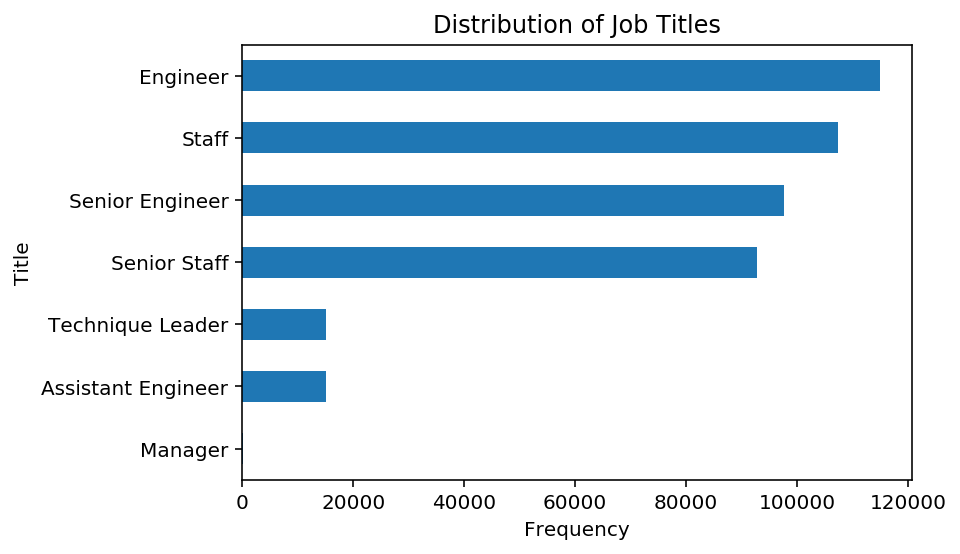

In [40]:
title_count.sort_values().plot(kind = 'barh')
plt.title("Distribution of Job Titles")
plt.xlabel("Frequency")
plt.ylabel("Title")

### 3f. Join the employees and titles dataframes together.

In [41]:
employees_and_titles = pd.merge(employees, titles, left_on='emp_no', right_on='emp_no', how='left')
employees_and_titles

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


### 3g. Visualize how frequently employees change titles. (INCOMPLETE)

In [42]:
titles['emp_no'].value_counts()

103876    3
467421    3
204120    3
105515    3
262553    3
         ..
201714    1
254956    1
250858    1
248809    1
10245     1
Name: emp_no, Length: 300024, dtype: int64

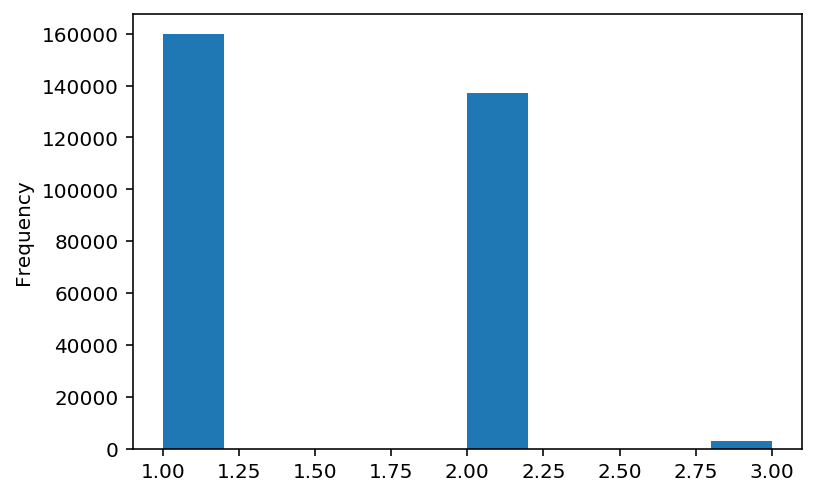

In [43]:
titles['emp_no'].value_counts().plot.hist()

In [44]:
# CHALLENGE EXTENSION:
# Possible strategy:
# Determine the length that any employee has a title for by looking at the difference
# between their from_date and their to_date. If to_date is current (9999-01-01),
# we will need to replace the current date with curdate()
# Once we have the list of differences, we can visualize that with a histogram

In [45]:
# We can find the differences between dates as long as the dtype in the from_date and to_date columns are the correct type
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     443308 non-null  int64 
 1   title      443308 non-null  object
 2   from_date  443308 non-null  object
 3   to_date    443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


In [46]:
# Our from_date was previously changed to datetime64[ns], but we need to apply the same change to our to_date column
try:
    titles['to_date'] = titles['to_date'].astype('datetime64[ns]')
except:
    print('OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 9999-01-01 00:00:00')

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 9999-01-01 00:00:00


In [47]:
# Before we can change our date time, we need to convert the 9999-01-01 (which represents current/today) to actual values
# Lets change all of the '9999-01-01' entries in our to_date column to the current date (INCOMPLETE)

### 3h. For each title, find the hire date of the employee that was hired most recently with that title.

In [48]:
titles['from_date'] = titles['from_date'].astype('datetime64[ns]')

In [49]:
titles.groupby('title').from_date.max()

title
Assistant Engineer   2000-02-01
Engineer             2002-08-01
Manager              1996-08-30
Senior Engineer      2002-08-01
Senior Staff         2002-08-01
Staff                2000-02-01
Technique Leader     2000-02-01
Name: from_date, dtype: datetime64[ns]

### 3i. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [50]:
# reading dept_emp table into DF. we will need this so we can connect dept names with titles
dept_emp = pd.read_sql('SELECT * FROM dept_emp', url)
# reading departments table into DF. we will need this so we can see department names instead of just dept numbers
depts = pd.read_sql('SELECT * FROM departments', url)

# creating DF that only holds employees with to_date equal to today or later via to_datetime (ie. current employee departments)
current_dept = dept_emp[dept_emp['to_date'] >= pd.to_datetime('today')]
# creating DF that only holds titles with to_date equal to today or later via to_datetime (ie. current employee titles)
current_titles = titles[titles['to_date'] >= pd.to_datetime('today')] 

# merging via inner join the current department DF with departments DF (no date filtering needed for departments since there are no dates in that table)
depts_and_dept_emps = pd.merge(current_dept, depts, left_on = 'dept_no', right_on = 'dept_no', how = 'inner')
# merging the current titles DF with the previous DF via inner join
titles_depts = pd.merge(depts_and_dept_emps, current_titles, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')

# creating crosstab for dept_name and titles
titles_depts_xtab = pd.crosstab(titles_depts.dept_name, titles_depts.title)

# displaying results
titles_depts_xtab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,11268,3574,241
Development,1652,14040,1,38816,1085,315,5477
Finance,0,0,1,0,9545,2891,0
Human Resources,0,0,1,0,9824,3073,0
Marketing,0,0,1,0,11290,3551,0
Production,1402,12081,1,33625,1123,349,4723
Quality Management,389,3405,1,9458,0,0,1293
Research,77,830,1,2250,9092,2870,321
Sales,0,0,1,0,28797,8903,0


## 4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [51]:
url = get_db_url('chipotle')

In [52]:
chipotle = pd.read_sql('SELECT * FROM orders', url)
chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [53]:
chipotle.describe()

,id,order_id,quantity
count,4622.000000,4622.000000,4622.000000
mean,2311.500000,927.254868,1.075725
std,1334.400802,528.890796,0.410186
min,1.000000,1.000000,1.000000
25%,1156.250000,477.250000,1.000000
50%,2311.500000,926.000000,1.000000
75%,3466.750000,1393.000000,1.000000
max,4622.000000,1834.000000,15.000000


In [54]:
chipotle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


### 4a. What is the total price for each order?

In [55]:
# The item_price column is made up of strings containing '$' followed by a float value
# We first need to clean this column before we can run numeric calculations on it
chipotle['item_price'] = chipotle['item_price'].str.replace('$', '')
chipotle['item_price'] = chipotle['item_price'].astype('float')
chipotle.head(10) 

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98
6,7,3,1,Side of Chips,nan,1.69
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",11.75
8,9,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25


In [56]:
# Inspection of the item_price column reveals that the value represents the total of all items purchased in that row
# In other words, if the customer ordered 2 canned sodas, the price is $2.18. If they ordered 1 canned soda, the price is $1.09
# We need to create a dataframe that has order_id as the index and a sum of all the item_price values for that order as the value
# We can create this with .groupby() and .sum()
chipotle.groupby('order_id').item_price.sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

### 4b. What are the most popular 3 items?

In [57]:
# Similar to above, we can group by item_name and take a sum of all the quanities purchased
chipotle.groupby('item_name').quantity.sum()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [58]:
# We can use nlargest and return the top 3 results
chipotle.groupby('item_name').quantity.sum().nlargest(3, keep = 'all')

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

### 4c. Which item has produced the most revenue?

In [59]:
# We can group by item_name and look at the sum of the item_price column for each item_name
chipotle.groupby('item_name').item_price.sum().nlargest(1, keep = 'all')

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

In [60]:
chipotle.groupby('item_name').item_price.sum().nlargest(1, keep = 'all').index[0]

'Chicken Bowl'

In [61]:
round(chipotle.groupby('item_name').item_price.sum().nlargest(1, keep = 'all')['Chicken Bowl'], 2)

7342.73

In [62]:
print(f"The {chipotle.groupby('item_name').item_price.sum().nlargest(1, keep = 'all').index[0]} produced the most revenue with ${round(chipotle.groupby('item_name').item_price.sum().nlargest(1, keep = 'all')['Chicken Bowl'], 2)} collected.")

The Chicken Bowl produced the most revenue with $7342.73 collected.


# END